<a href="https://colab.research.google.com/github/DeDTihoN/PR_labs/blob/master/PR1_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [255]:
# Cell 1: Встановлення та імпорт бібліотек
!pip install scikit-learn seaborn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, roc_curve, auc,
                             classification_report, confusion_matrix)


- Встановлюємо бібліотеки та імпортуємо модулі для роботи з даними, візуалізації та оцінки моделей.

In [256]:
# Cell 2: Завантаження та підготовка даних
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target  # 0 = malignant, 1 = benign

# Вибір 5 слабо корельованих ознак
selected_features = [
    'mean symmetry',     # середня симетрія
    'fractal dimension error',      # помилка текстури
    'worst concavity',    # максимальна вогнутість
    'mean smoothness',    # середня гладкість
    'perimeter error',     # помилка периметра
    'mean radius',
    'mean area',
    'worst area',
]
df = df[selected_features + ['Target']]

- Завантажуємо Breast Cancer датасет.  
- Вибираємо 5 ознак із різних груп (mean, se, worst)

In [257]:
# 3. Попередній огляд
print("Selected features:", selected_features)
print("Class counts:\n", df['Target'].value_counts(), "\n")
df.head()

Selected features: ['mean symmetry', 'fractal dimension error', 'worst concavity', 'mean smoothness', 'perimeter error', 'mean radius', 'mean area', 'worst area']
Class counts:
 Target
1    357
0    212
Name: count, dtype: int64 



,mean symmetry,fractal dimension error,worst concavity,mean smoothness,perimeter error,mean radius,mean area,worst area,Target
0,0.2419,0.006193,0.7119,0.11840,8.589,17.99,1001.0,2019.0,0
1,0.1812,0.003532,0.2416,0.08474,3.398,20.57,1326.0,1956.0,0
2,0.2069,0.004571,0.4504,0.10960,4.585,19.69,1203.0,1709.0,0
3,0.2597,0.009208,0.6869,0.14250,3.445,11.42,386.1,567.7,0
4,0.1809,0.005115,0.4000,0.10030,5.438,20.29,1297.0,1575.0,0


- Перевіряємо перші рядки DataFrame, щоб упевнитися в наявності обраних колонок.

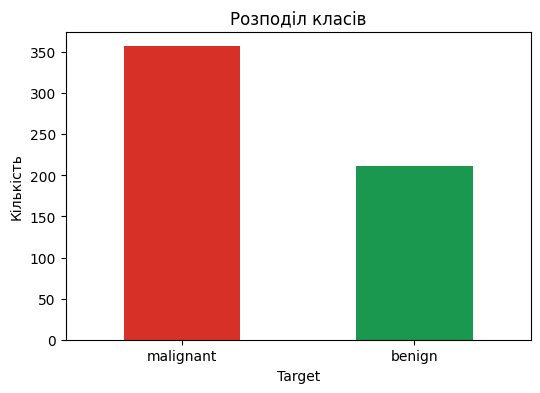

In [258]:
# Cell 4: Розподіл класів
plt.figure(figsize=(6,4))
df['Target'].value_counts().plot(kind='bar', color=['#d73027','#1a9850'])
plt.xticks([0,1], ['malignant','benign'], rotation=0)
plt.title('Розподіл класів')
plt.xlabel('Target')
plt.ylabel('Кількість')
plt.show()

- Аналіз балансу класів: скільки зразків malignant (0) та benign (1).

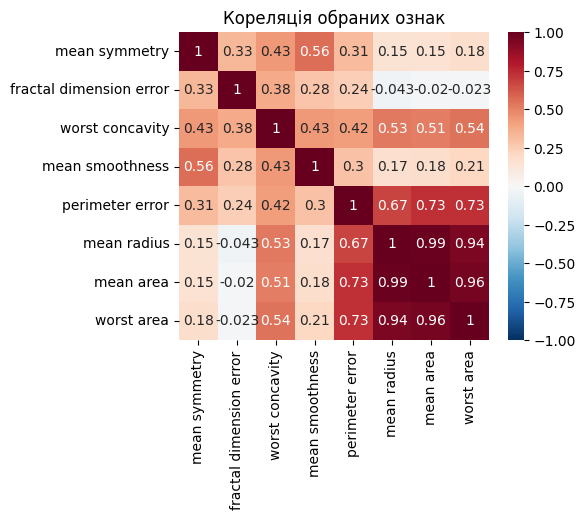

In [259]:
# Cell 5: Кореляція обраних ознак
corr = df[selected_features].corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='RdBu_r', vmin=-1, vmax=1)
plt.title('Кореляція обраних ознак')
plt.show()

- Дивимось таблицю кореляцію вхідних ознак

<ipython-input-260-8acfdd9495e5>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop = df.groupby('bin')['Target'].mean()


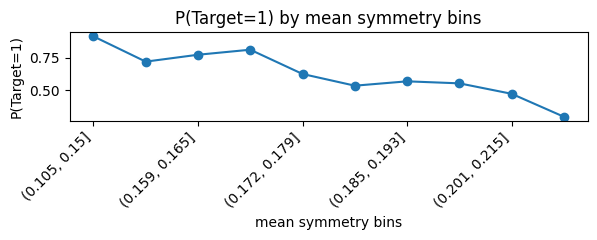

<ipython-input-260-8acfdd9495e5>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop = df.groupby('bin')['Target'].mean()
<ipython-input-260-8acfdd9495e5>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


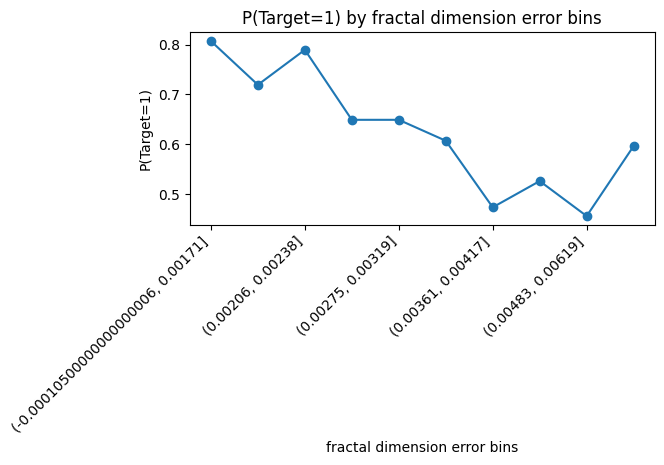

<ipython-input-260-8acfdd9495e5>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop = df.groupby('bin')['Target'].mean()


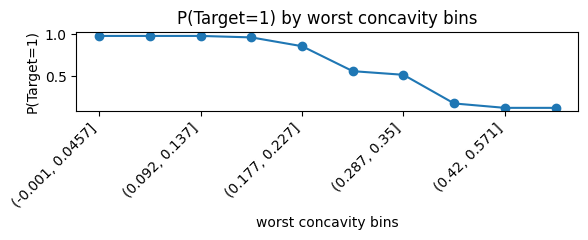

<ipython-input-260-8acfdd9495e5>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop = df.groupby('bin')['Target'].mean()


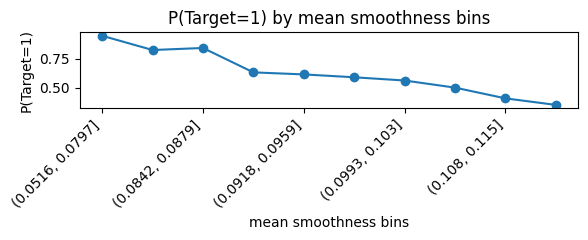

<ipython-input-260-8acfdd9495e5>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop = df.groupby('bin')['Target'].mean()


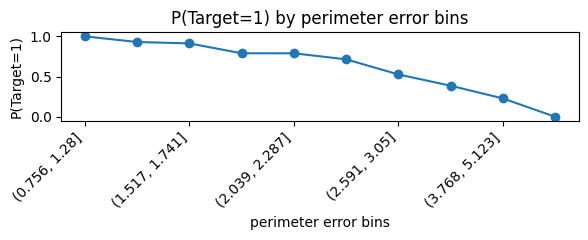

<ipython-input-260-8acfdd9495e5>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop = df.groupby('bin')['Target'].mean()


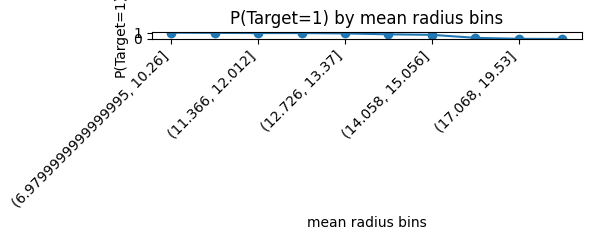

<ipython-input-260-8acfdd9495e5>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop = df.groupby('bin')['Target'].mean()


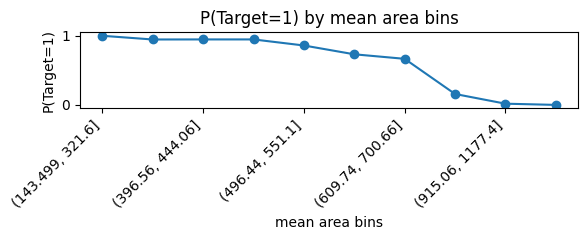

<ipython-input-260-8acfdd9495e5>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop = df.groupby('bin')['Target'].mean()


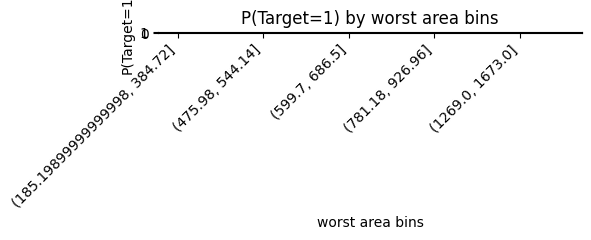

In [260]:
# Cell 6: Ймовірність Target=1 по біннах ознак
for feat in selected_features:
    df['bin'] = pd.qcut(df[feat], q=10, duplicates='drop')
    prop = df.groupby('bin')['Target'].mean()
    plt.figure(figsize=(6,2.5))
    prop.plot(marker='o')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'P(Target=1) by {feat} bins')
    plt.xlabel(f'{feat} bins')
    plt.ylabel('P(Target=1)')
    plt.tight_layout()
    plt.show()

df.drop(columns=['bin'], inplace=True)

- Аналізуємо, як ймовірність benign (1) змінюється при рості значень кожної ознаки.

In [261]:
# Cell 7: Розбиття на train/test
X = df[selected_features]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

- Створюємо навчальну (80%) та тестову (20%) вибірки з випадковим перемішуванням.

In [262]:
# Cell 8: Навчання sklearn GaussianNB
sk_model = GaussianNB()
sk_model.fit(X_train, y_train)
y_pred_sk = sk_model.predict(X_test)
y_prob_sk = sk_model.predict_proba(X_test)[:,1]

- Налаштовуємо та навчаємо Gaussian Naive Bayes від scikit-learn на обраних ознаках.

Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

   malignant       1.00      0.91      0.95        43
      benign       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



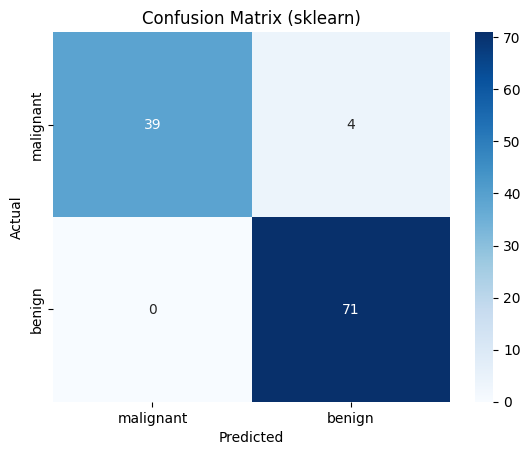

AUC: 0.996069439895185


In [263]:
# Cell 9: Оцінка sklearn-моделі
print("Accuracy:", accuracy_score(y_test, y_pred_sk))
print(classification_report(y_test, y_pred_sk, target_names=data.target_names))
cm_sk = confusion_matrix(y_test, y_pred_sk)
sns.heatmap(cm_sk, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title('Confusion Matrix (sklearn)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

fpr_sk, tpr_sk, _ = roc_curve(y_test, y_prob_sk)
auc_sk = auc(fpr_sk, tpr_sk)
print("AUC:", auc_sk)

Матриця невідповідностей показала кількість правильних і хибних класифікацій по кожному класу.  
ROC-крива та AUC ілюструють загальну якість класифікатора незалежно від порогу.

In [264]:
# Cell 10: Реалізація In-House GaussianNB
class InHouseGaussianNB:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = {}
        self.vars  = {}
        self.priors = {}
        for c in self.classes:
            X_c = X[y == c]
            self.means[c]  = X_c.mean(axis=0)
            self.vars[c]   = X_c.var(axis=0) + 1e-6
            self.priors[c] = len(X_c) / len(X)
    def _log_gauss(self, x, mean, var):
        return -0.5*np.log(2*np.pi*var) - ((x-mean)**2)/(2*var)
    def predict_proba(self, X):
        probs = []
        for _, x in X.iterrows():
            log_posts = {}
            for c in self.classes:
                log_prior = np.log(self.priors[c])
                ll        = self._log_gauss(x, self.means[c], self.vars[c]).sum()
                log_posts[c] = log_prior + ll
            max_log = max(log_posts.values())
            exps    = {c: np.exp(log_posts[c]-max_log) for c in self.classes}
            total   = sum(exps.values())
            probs.append([exps[c]/total for c in self.classes])
        return np.array(probs)
    def predict(self, X):
        proba = self.predict_proba(X)
        return self.classes[np.argmax(proba, axis=1)]

Власна реалізація GaussianNB

Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

   malignant       1.00      0.91      0.95        43
      benign       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



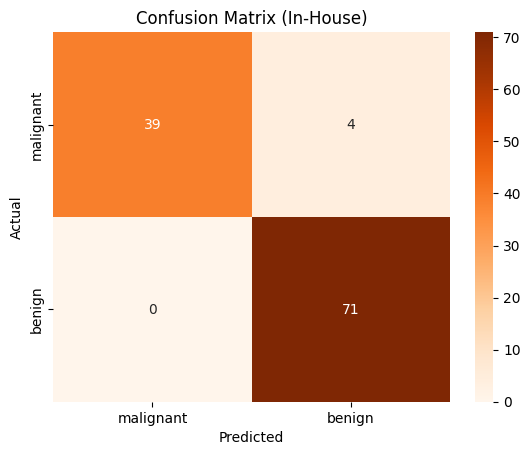

AUC: 0.996069439895185


In [265]:
# Cell 11: Оцінка In-House GaussianNB
ih_model = InHouseGaussianNB()
ih_model.fit(X_train, y_train)
y_pred_ih = ih_model.predict(X_test)
y_prob_ih = ih_model.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred_ih))
print(classification_report(y_test, y_pred_ih, target_names=data.target_names))
cm_ih = confusion_matrix(y_test, y_pred_ih)
sns.heatmap(cm_ih, annot=True, fmt='d', cmap='Oranges',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title('Confusion Matrix (In-House)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

fpr_ih, tpr_ih, _ = roc_curve(y_test, y_prob_ih)
auc_ih = auc(fpr_ih, tpr_ih)
print("AUC:", auc_ih)

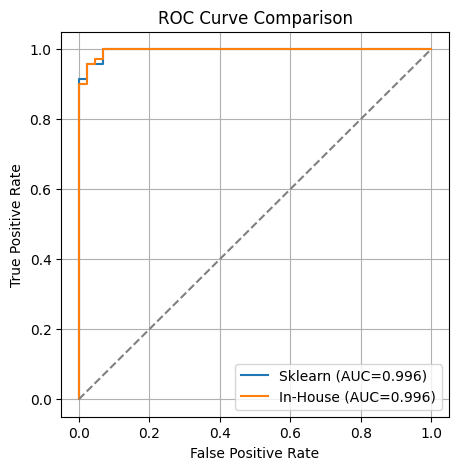

In [266]:
# Cell 12: Порівняння ROC-кривих
plt.figure(figsize=(5,5))
plt.plot(fpr_sk, tpr_sk, label=f'Sklearn (AUC={auc_sk:.3f})')
plt.plot(fpr_ih, tpr_ih, label=f'In-House (AUC={auc_ih:.3f})')
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()